# Exploration of FordGoBike and Baywheels data from Lyft in San Francisco to elaborate growth and business oportunities

## by Alex (DAND 2020)

## Investigation and Dataset

The project is part of the Udacity Data Analyst Nano Degree (DAND) program and aims on data visualization in both ways - exploratory and explainatory.  
  
The project has been executed using a dataset from FordGoBike and Lyft Baywheels from the San Francisco area.
This file contains the exploration of the data.  
The explanation part is covered in a separate file. At the moment of analysis, the dataset contains bike sharing rides from June 2017 till April 2020 which was automaticaly downloaded from the source.  
Over 3 million rides are described by 13 different dimensions and datapoints.  
The dataset contains ride-related and anonymized data only. That means, no user data or user names or personal data is content of the raw data.  

Each trip is anonymized and includes:  

Trip Duration (in seconds)  
Start Time and Date  
End Time and Date  
Start Station ID  
Start Station Name  
Start Station Latitude  
Start Station Longitude  
End Station ID  
End Station Name  
End Station Latitude  
End Station Longitude  
Bike ID  
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)  
  
Source of and download of the raw data: https://www.lyft.com/bikes/bay-wheels/system-data  

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv("bikesharing_combined_all_data.csv")

In [8]:
#Defaults for visualization
sb.set_style('darkgrid')
default_color = sb.color_palette()[0]

## Who is using the bike services? (subscribers or casual user)

The user type "subscriber" is responsible for over 80% of the total rides. At the moment there are different subscriber and member packages available.   
Pricing details can be found under the following link: https://www.lyft.com/bikes/bay-wheels/pricing


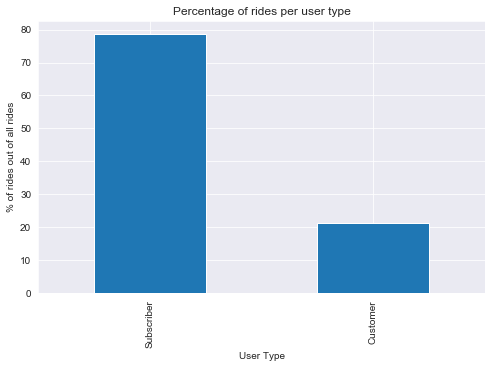

In [11]:
plt.figure(figsize=[8, 5])
(df_bike.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color)
plt.title("Percentage of rides per user type")
plt.ylabel("% of rides out of all rides")
plt.xlabel("User Type");

## Is there a change of usage over the year (e.g. winter/summer)?

The graph shows that for both years 2018 and 2019, there seems to be a different usage of the bike ride service during summer vs. winter time.  
  
Difference between 2018 and 2019, there was more travels during Spring and Automn in the year 2019, the peak in 2018 was from may to october without a valley during summer.  
  
2018 has the major peak of use in July and October.  
2019 has the major peak of use in March, April, July and October.  

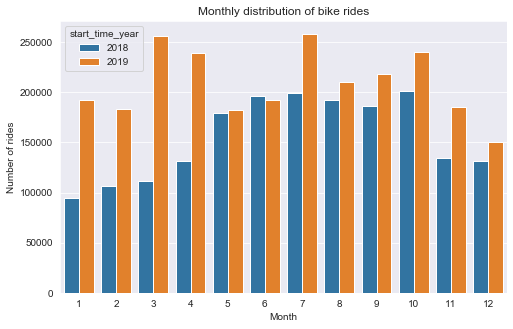

In [17]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df_bike[df_bike['start_time_year']<2020], x='start_time_month',hue='start_time_year');
plt.title('Monthly distribution of bike rides');
plt.ylabel('Number of rides');
plt.xlabel('Month')

## At what day per week the ride service is used from what user type?

As output from this graph it seems that the ForGoBike/ BayWheels service is mostly used by subscribers during workdays (Mo-Fr) rather than on the weekend (Sat and Sun).  
Customers use the service more on a regular base during weekday and weekend.  

Text(0.5, 0, 'Day')

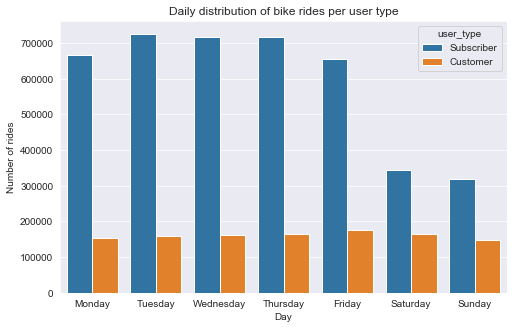

In [13]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df_bike, x='start_time_dow', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='user_type');
plt.title('Daily distribution of bike rides per user type');
plt.ylabel('Number of rides');
plt.xlabel('Day')

## Is the service mostly used by subscribers for work and by students going from home to work/university and back?


Is the service mostly used by subscribers for work and by students going from home to work/university and back?  
And maybe customers are more often tourists and visitors of the SF area?

Text(0.5, 0, 'Hour')

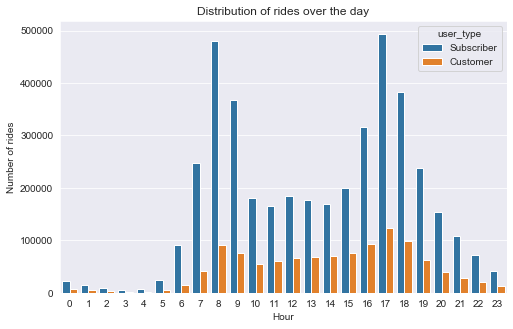

In [14]:
plt.figure(figsize=[8,5])
sb.countplot(data=df_bike, x='start_time_hour', hue='user_type');
plt.title('Distribution of rides over the day');
plt.ylabel('Number of rides');
plt.xlabel('Hour')

## What is the distribution of duration of a bike ride?

The graph is limited to a duration of 3000 sec.  

The graph shows, that most travels are between 2 minutes (120 sec) and 12 minutes (720 sec).  

So the users are doing more short travels or comutes, rather than long rides with this bike ride service.  

(1, 3000)

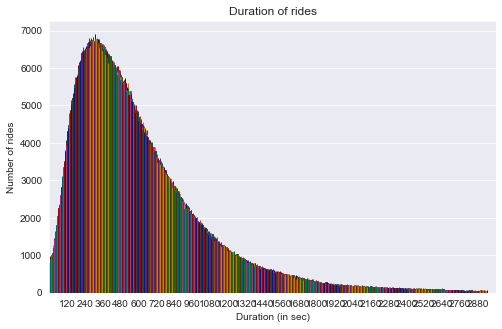

In [15]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df_bike[df_bike['duration_sec']<=3000], x='duration_sec', edgecolor=sb.color_palette("dark"));
plt.title('Duration of rides');
plt.ylabel('Number of rides');
plt.xlabel('Duration (in sec)')
ticks = np.arange(0, 3000, 120)
plt.xticks(ticks, ticks);
plt.xlim(1,3000)

## Heatmap regarding the hourly usage during the day per user type.

From the last chapter I like the headmap of the `subscriber` user type.

From a business development perspective to gain more growth, we have to ask ourselves what we can do with the bikes in the timeframe from 10 a.m. up to 3 p.m. and in the timeslot 7 p.m. up to 6 a.m. to gain more profit?

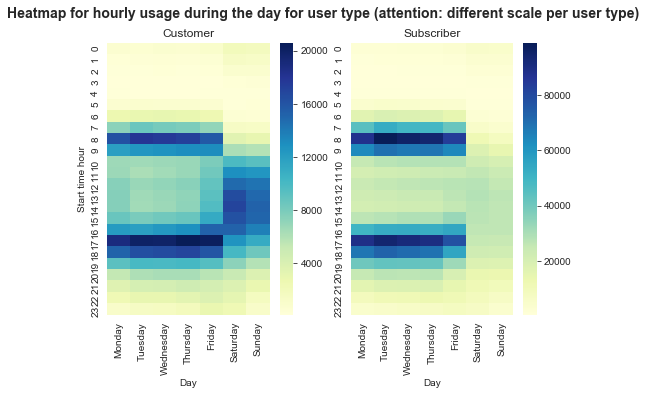

In [16]:
#Set order of weekday (start_time_dow)
df_bike['start_time_dow'] = pd.Categorical(df_bike['start_time_dow'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
plt.figure(figsize=(8,5))
plt.suptitle('Heatmap for hourly usage during the day for user type (attention: different scale per user type)', fontsize=14, fontweight='semibold')

#heatmap customers
plt.subplot(1, 2, 1)
df_customer = df_bike.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_dow"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_dow", "bike_id")
sb.heatmap(df_customer, cmap="YlGnBu")

plt.title("Customer", y=1.020)
plt.xlabel('Day')
plt.ylabel('Start time hour')

#heatmap subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_bike.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_dow"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_dow", "bike_id")
sb.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1.020)
plt.xlabel('Day')
plt.ylabel('');